<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stats</a></span></li><li><span><a href="#Text-manipulation" data-toc-modified-id="Text-manipulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text manipulation</a></span><ul class="toc-item"><li><span><a href="#Reconcile-0" data-toc-modified-id="Reconcile-0-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reconcile 0</a></span></li><li><span><a href="#Reconcile-1" data-toc-modified-id="Reconcile-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reconcile 1</a></span></li></ul></li><li><span><a href="#Block" data-toc-modified-id="Block-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Block</a></span><ul class="toc-item"><li><span><a href="#Reconcile-0" data-toc-modified-id="Reconcile-0-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reconcile 0</a></span></li><li><span><a href="#Reconcile-1" data-toc-modified-id="Reconcile-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reconcile 1</a></span></li></ul></li><li><span><a href="#Export-cleaned" data-toc-modified-id="Export-cleaned-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export cleaned</a></span><ul class="toc-item"><li><span><a href="#Cleaned-line" data-toc-modified-id="Cleaned-line-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cleaned line</a></span></li><li><span><a href="#Cleaned-block" data-toc-modified-id="Cleaned-block-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cleaned block</a></span></li></ul></li></ul></div>

In [287]:
import pandas as pd
import json
from glob import glob
import numpy as np
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [288]:
ocr_files = glob('data/ocr_alto/*.json')

In [3]:
df_rep = pd.read_excel('repertoires.xlsx')
df_rep.dropna(subset=['nom_court'], inplace=True)
df_rep['ids'] = df_rep['lien_source'].str.replace('https://gallica.bnf.fr/ark:/12148/', '')
df_rep['vue_debut'] = df_rep['vue_debut'].astype(int)
df_rep['annee'] = df_rep['annee'].astype(int)
# df_rep['annee'] = pd.to_datetime(df_rep['annee'].astype(int), format='%Y')
df_rep.set_index('ids', inplace=True)
df_rep.head()

,nom_court,annee,remarques,lien_source,source_ID,vue_debut,page_debut,vue_fin,page_fin,page_total,pages,nom_fichier
ids,,,,,,,,,,,,
bpt6k63243601,Annuaire-general-du-commerce,1839,NaN,https://gallica.bnf.fr/ark:/12148/bpt6k63243601,FRBNF32698036,123,103.0,399.0,379,1457,277.0,bpt6k63243601.Alto.html
bpt6k62931221,Annuaire-general-du-commerce,1841,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k62931221,FRBNF32698036,151,72.0,423.0,344,938,273.0,bpt6k62931221.Alto.html
bpt6k6286466w,Annuaire-general-du-commerce,1842,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6286466w,FRBNF32698036,189,91.0,489.0,391,939,301.0,bpt6k6286466w.Alto.html
bpt6k6393838j,Annuaire-general-du-commerce,1843,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6393838j,FRBNF32698036,219,107.0,482.0,378,969,264.0,bpt6k6393838j.Alto.html
bpt6k6331310g,Annuaire-general-du-commerce,1844,La dernière page comprend le début d'une autre...,https://gallica.bnf.fr/ark:/12148/bpt6k6331310g,FRBNF32698036,216,103.0,483.0,372,977,268.0,bpt6k6331310g.Alto.html


In [5]:
df = pd.read_pickle('gallica_ocr.pickle')

In [ ]:
df = pd.DataFrame(columns = ['text', 'confidence', 'full_text', 'is_hyphen', 'document', 'page', 'block', 'line', 'word'])

for idx_document, ocr_file in tqdm(enumerate(ocr_files[:10])):
    doc_id = ocr_file.split('\\')[-1].split('_')[0]
    vue_debut = int(df_rep.loc[doc_id]['vue_debut'])
    with open(ocr_file, 'r', encoding='utf-8') as infile:
        data = json.load(infile)
    for idx_page, page in tqdm(enumerate(data), leave=False):
        for idx_block, block in enumerate(page):
            for idx_line, line in enumerate(block):
                for idx_word, word in enumerate(line):
                    word['document'] = doc_id
                    word['page'] =  vue_debut + idx_page
                    word['block'] = idx_block
                    word['line'] = idx_line
                    word['word'] = idx_word
                    full_text = word['text']
                    is_hypen = False
                    if 'full_text' in word:
                        full_text = word['full_text']
                        is_hypen = True
                    df.append({'text' : word['text'],
                               'confidence': word['confidence'],
                               'full_text': full_text,
                               'is_hyphen': True,
                               'document' : doc_id,
                               'page' : vue_debut + idx_page,
                               'block' : idx_block,
                               'line': idx_line,
                               'word': idx_word
                              }, ignore_index=True)

In [9]:
rows = []
for idx_document, ocr_file in tqdm(enumerate(ocr_files[:10])):
    doc_id = ocr_file.split('\\')[-1].split('_')[0]
    vue_debut = int(df_rep.loc[doc_id]['vue_debut'])
    with open(ocr_file, 'r', encoding='utf-8') as infile:
        data = json.load(infile)
    for idx_page, page in tqdm(enumerate(data), leave=False):
        for idx_block, block in enumerate(page):
            for idx_line, line in enumerate(block):
                for idx_word, word in enumerate(line):
                    word['document'] = doc_id
                    word['page'] =  vue_debut + idx_page
                    word['block'] = idx_block
                    word['line'] = idx_line
                    word['word'] = idx_word
                    rows.append(word)

In [95]:
df = pd.DataFrame(rows)
df = df[['text', 'confidence', 'full_text', 'is_hypen', 'document', 'page', 'block', 'line', 'word']]
df['is_hypen'] = df['is_hypen'].fillna(False)
df['full_text'] = df['full_text'].fillna(df['text'])
df['confidence'] = df['confidence'].astype(float)
df.set_index(['document', 'page', 'block', 'line', 'word'], inplace=True)
df.head()

text  confidence        full_text  \
document      page block line word                                              
bpt6k6282019m 72.0 0     0    0           Bertin        1.00           Bertin   
                              1                (        1.00                (   
                              2            Mme),        0.99            Mme),   
                              3      sage-femme,        0.99      sage-femme,   
                              4     St-Lquis-Ma-        0.92  St-Lquis-Marais   

                                    is_hypen  
document      page block line word            
bpt6k6282019m 72.0 0     0    0        False  
                              1        False  
                              2        False  
                              3        False  
                              4         True

## Stats

In [7]:
confidence_per_word = df['confidence']
mean_confidence_per_line = df.groupby(level=[0, 1, 2, 3])['confidence'].mean()
min_per_line = df.groupby(level=[0, 1, 2, 3])['confidence'].min()
mean_confidence_per_block = df.groupby(level= [0,1,2])['confidence'].mean()
mean_confidence_per_page = df.groupby(level=[0,1])['confidence'].mean()
mean_confidence_per_doc = df.groupby(level=[0])['confidence'].mean()

In [8]:
words_per_line = df.groupby(level=[0,1,2,3]).size()
words_per_block = df.groupby(level=[0,1,2]).size()
lines_per_block = df.reset_index(level=[3, 4]).groupby(level=[0,1,2])['line'].nunique()
block_per_page = df.reset_index(level=[2, 3, 4]).groupby(level=[0,1])['block'].nunique()

In [9]:
pd.concat([confidence_per_word.describe().to_frame('word'),
           mean_confidence_per_line.describe().to_frame('line'),
           mean_confidence_per_block.describe().to_frame('block'),
           mean_confidence_per_page.describe().to_frame('page'),
           mean_confidence_per_doc.describe().to_frame('doc')], axis=1)

,word,line,block,page,doc
count,4.138249e+07,8.441577e+06,4.370665e+06,27574.000000,56.000000
mean,9.683640e-01,9.668794e-01,9.667397e-01,0.967811,0.965855
std,7.612978e-02,5.393955e-02,4.533773e-02,0.021494,0.013194
min,0.000000e+00,0.000000e+00,0.000000e+00,0.569483,0.928277
25%,9.800000e-01,9.600000e-01,9.582609e-01,0.960340,0.955983
50%,1.000000e+00,9.857143e-01,9.808333e-01,0.971880,0.967205
75%,1.000000e+00,9.960000e-01,9.925000e-01,0.982174,0.976332
max,1.000000e+00,1.000000e+00,1.000000e+00,0.996642,0.989646


In [10]:
pd.DataFrame(
    np.vstack([np.percentile(x, [0.01, 0.1, 0.5, 1, 2, 5])
               for x in [confidence_per_word, mean_confidence_per_line, mean_confidence_per_block, mean_confidence_per_page, mean_confidence_per_doc]])
    ,columns=[0.01, 0.1, 0.5, 1, 2, 5]).T.rename(columns=dict(enumerate(['word', 'line', 'block', 'page', 'doc'])))

,word,line,block,page,doc
0.01,0.00,0.110,0.281300,0.621778,0.928343
0.10,0.26,0.458,0.533247,0.799092,0.928942
0.50,0.52,0.670,0.730000,0.870463,0.931601
1.00,0.62,0.750,0.789360,0.890554,0.934925
2.00,0.72,0.810,0.837000,0.907985,0.940837
5.00,0.83,0.875,0.890000,0.931146,0.945948


In [25]:
sum(confidence_per_word == 0.99)

8544861

In [26]:
sum(confidence_per_word == 1.0)

21630057

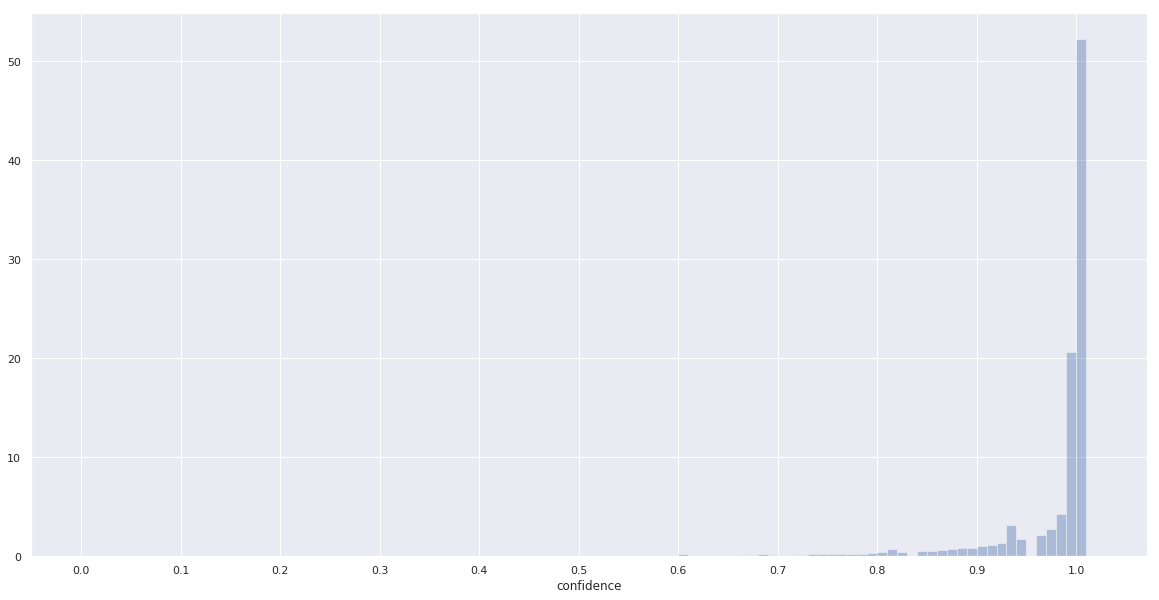

In [56]:
plt.figure(figsize=(20,10))
start = 0.0
end = 1.01
plt.xticks(np.arange(start,end+0.02, 0.1))
plt.grid(True)
sns.distplot(confidence_per_word[(confidence_per_word >= start) & (confidence_per_word <= end)], norm_hist=True, kde=False, bins=np.arange(start, end+0.02, 0.01))

In [69]:
(words_per_line == 13).idxmax()

('bpt6k6282019m', 126, 171, 0)

In [68]:
df.loc[(words_per_line == 13).idxmax()]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,text,confidence,full_text,is_hypen
word,,,,
0,-,1.00,-,False
1,-'--,1.00,-'--,False
2,--1,1.00,--1,False
3,7,1.00,7,False
4,r-W,0.05,r-W,False
5,-,1.00,-,False
6,----,1.00,----,False
7,---,1.00,---,False
8,--,1.00,--,False


In [34]:
pd.concat([words_per_line.describe().to_frame('words/line'),
           words_per_block.describe().to_frame('words/block'),
           lines_per_block.describe().to_frame('lines/block'),
           block_per_page.describe().to_frame('blocks/page')], axis=1)

,words/line,words/block,lines/block,blocks/page
count,8.441577e+06,4.370665e+06,4.370665e+06,27574.000000
mean,4.902223e+00,9.468237e+00,1.931417e+00,158.506745
std,1.986829e+00,6.729025e+00,1.149794e+00,26.347408
min,1.000000e+00,1.000000e+00,1.000000e+00,8.000000
25%,4.000000e+00,5.000000e+00,1.000000e+00,140.000000
50%,5.000000e+00,8.000000e+00,2.000000e+00,151.000000
75%,6.000000e+00,1.200000e+01,2.000000e+00,182.000000
max,3.000000e+01,3.500000e+02,5.000000e+01,241.000000


In [19]:
pd.DataFrame(
    np.vstack([np.percentile(x, [50, 75, 90, 95, 99, 99.5, 99.9, 99.99])
               for x in [words_per_line, words_per_block, lines_per_block, block_per_page]])
    ,columns=[50, 75, 90, 95, 99, 99.5, 99.9, 99.99]).T.rename(columns=dict(enumerate(['words/line', 'words/block', 'lines/block', 'blocks/page'])))

,words/line,words/block,lines/block,blocks/page
50.00,5.0,8.0,2.0,151.00
75.00,6.0,12.0,2.0,182.00
90.00,7.0,17.0,3.0,198.00
95.00,8.0,22.0,4.0,204.00
99.00,9.0,34.0,6.0,214.27
99.50,9.0,40.0,7.0,218.00
99.90,10.0,57.0,10.0,225.00
99.99,12.0,93.0,16.0,234.00


In [85]:
df.loc[1, 59, 133]

text  confidence  full_text  is_hypen
line word                                            
0    0     Chaussin,        0.99  Chaussin,     False
     1        peint,        0.99     peint,     False
     2        émaill        0.87     émaill     False
     3            én        0.87         én     False
     4      cadrabs,        0.87   cadrabs,     False
     5       Temple,        0.37    Temple,     False
     6           39.        0.37        39.     False

In [84]:
" ".join(df.loc[1, 59, 133]['text'].values)

'Chaussin, peint, émaill én cadrabs, Temple, 39.'

In [100]:
df[(df['confidence'] > 0.65) & (df['confidence'] < 0.7)].sample(25)

,,,,,text,confidence,full_text,is_hypen
document,page,block,line,word,,,,
bpt6k6292987t,388.0,117,0,3,"(Ils,",0.66,"(Ils,",False
bpt6k6314752k,224.0,29,0,0,"Blocil,",0.69,"Blocil,",False
bpt6k6315927h,597.0,66,2,2,TIOUV.,0.69,TIOUV.,False
bpt6k6315985z,101.0,166,2,2,dé,0.69,dé,False
bpt6k6286466w,454.0,151,0,3,£,0.67,£,False
bpt6k6292987t,370.0,4,0,6,Web,0.66,Web,False
bpt6k6315985z,256.0,185,1,0,65.,0.66,65.,False
bpt6k6315927h,468.0,123,0,3,11.,0.67,11.,False
bpt6k62906378,307.0,107,0,1,"4,",0.67,"4,",False


In [29]:
df[mean_per_line < 0.9]

D:\APPLICATIONS\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


text  confidence  \
document page block line word                                              
0        0    7     0    0                            Bertin        1.00   
                         1            (J.),vins,Roquette,51.        0.84   
                         2                                 *        0.84   
              8     1    0                          Oharaps,        0.82   
                         1                               26.        0.82   
                         2                                ,'        1.00   
              10    0    0                            Bertin        1.00   
                         1                                de        0.95   
                         2                            Chalup        0.95   
                         3                                 4        0.28   
                         4                                 i        0.28   
                         5                            ancien        0.99   
                         6                              chef        1.00   
                         7                       d'escadron,        0.97   
                    1    0                     ViMe-FEveque,        0.69   
                         1                                27        0.94   
                         2                              bis.        0.99   
              12    0    0                               des        1.00   
                         1                       Beaux-Arts,        0.96   
                         2                        Sts-Pères,        0.99   
                         3                                7.        0.58   
              14    0    0                                 l        0.18   
                         1                         Bcrtinot,        0.92   
                         2                             avoué        1.00   
                         3                               Ire        0.96   
                         4                         instance,        0.99   
                         5                         Vivienne,        0.99   
                         6                               10.        1.00   
              24    0    0                            Berton        0.51   
                         1                              (À.)        0.51   
...                                                      ...         ...   
9        322  26    0    5                              eau,        0.78   
                         6                               37.        0.78   
              28    1    0     Nve-St-EHenne-Bonne-Nouvelle,        0.87   
                         1                                2.        0.87   
              55    1    0                            glane,        0.85   
                         1                               lb.        0.57   
              124   0    0                             Bazar        0.89   
                         1                                de        1.00   
                         2                                 V        0.56   
                         3                        Industrie,        0.56   
                         4                       Montmartre,        0.99   
                         5                              180,        1.00   
                         6                                et        1.00   
              128   2    0                       Université,        0.89   
                         1                              126.        0.89   
              136   1    0                             Faub.        0.99   
                         1                       -St-Martin,        0.99   
                         2                             ?'TL.        0.41   
                         3                                 1        0.60   
              166   0    0                             Bazin        1.00   
                         1  

In [10]:
data = df_rep.join(df.groupby(level=[0])['confidence'].mean()).dropna(subset=['confidence'])[['annee', 'confidence']].sort_values(by='annee')

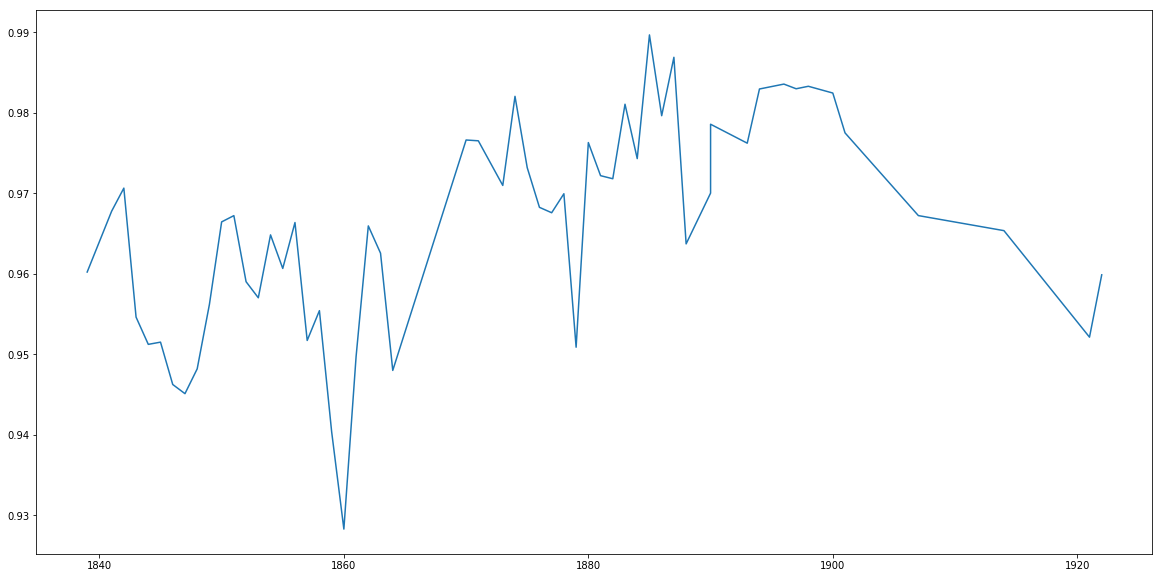

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data['annee'], data['confidence'])

In [88]:
text_occurences = df['text'].value_counts()
text_occurences.index = text_occurences.index.astype(str)

In [107]:
text_occurences.loc['*']

44823

In [135]:
idx = pd.IndexSlice
df.loc[idx]

KeyError: "['word'] not in index"

In [99]:
text_occurences[text_occurences.index.str.endswith(',')].sum()

16790540

In [130]:
df.loc[(lines_per_block > 3).sample(10)]

KeyboardInterrupt: 

In [129]:
lines_per_block > 3.sample(10)

SyntaxError: invalid syntax (<ipython-input-129-fb7f4cb5f80c>, line 1)

In [125]:
lines_per_block > 3

document       page  block
bpt6k6282019m  72    0        False
                     1        False
                     2        False
                     3        False
                     4        False
                     5        False
                     6        False
                     7        False
                     8        False
                     9        False
                     10       False
                     11       False
                     12       False
                     13       False
                     14       False
                     15       False
                     16       False
                     17       False
                     18       False
                     19       False
                     20       False
                     21       False
                     22       False
                     23       False
                     24       False
                     25       False
                     26       False
 

## Text manipulation

In [ ]:
def get_words_line(doc_id, vue_debut, idx_page, idx_block, idx_line, line, offset_words=0):
    words = []
    for idx_word, word in enumerate(line):
        row = {}
        row['document'] = doc_id
        row['page'] =  vue_debut + idx_page
        row['block'] = idx_block
        row['line'] = idx_line
        row['word'] = offset_words+idx_word
        row['text'] = word['text']
        row['full_text'] = row['text']
        row['is_hyphen'] = False
        if 'full_text' in word:
            row['full_text'] = word['full_text']
            row['is_hyphen'] = True
        words.append(row)
    return words
def correct_idx(objects, key, offset):
    for obj in objects:
        obj[key] += offset
def merge_list_dropping(lists):
    res = []
    if len(lists) <= 0:
        return res
    res.extend(lists[0])
    for i in range(1, len(lists)):
        l = lists[i]
        if len(l) > 1:
            res.extend(lists[i][1:])
    return res

In [ ]:
rows = []
for idx_document, ocr_file in tqdm(enumerate(ocr_files)):
    doc_id = ocr_file.split('/')[-1].split('_')[0]
    vue_debut = int(df_rep.loc[doc_id]['vue_debut'])
    with open(ocr_file, 'r', encoding='utf-8') as infile:
        data = json.load(infile)
    for idx_page, page in tqdm(enumerate(data), leave=False):
        for idx_block, block in enumerate(page):
            ending = np.array([('full_text' in x[-1]) and len(x) > 1 for x in block])
            transititons = ending[1:]*2+ending[:-1]
            new_lines = np.split(block, np.where((transititons == 0) | (transititons == 2))[0]+1)
            new_lines = [merge_list_dropping(lines) for lines in new_lines]
            for idx_line, line in enumerate(new_lines):
                rows.extend(get_words_line(doc_id, vue_debut, idx_page, idx_block, idx_line, line))

In [8]:
df = pd.DataFrame(rows)
df = df[['text', 'full_text', 'is_hyphen', 'document', 'page', 'block', 'line', 'word']]
df.set_index(['document', 'page', 'block', 'line', 'word'], inplace=True)
df_lines = df.groupby(level=[0,1,2,3])['full_text'].apply(lambda x: ' '.join(x))
df_lines.to_pickle('df_lines.pickle')
df.head()

text full_text  is_hyphen
document      page block line word                             
bpt6k97630871 11   0     0    0     Gerboz    Gerboz      False
                              1       (F.)      (F.)      False
                              2      fils,     fils,      False
                              3       sacs      sacs      False
                              4         en        en      False

In [4]:
df_lines = pd.read_pickle('df_lines.pickle')

In [5]:
lines_per_doc = df_lines.groupby(level=[0]).count()
lines_not_maj_per_doc = df_lines.str.contains(r'^[^A-Z]').groupby(level=[0]).sum()

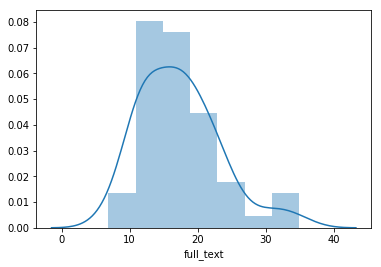

In [7]:
sns.distplot(lines_not_maj_per_doc/lines_per_doc*100)

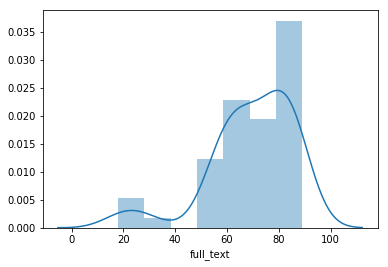

In [281]:
sns.distplot(df_lines.str.contains(r'^(?![A-Z])\w').groupby(level=[0]).sum()/lines_not_maj_per_doc*100)

In [238]:
char_counts = df_lines[df_lines.str.contains(r'^[^A-Z]')].apply(lambda x: x[0]).value_counts()

In [44]:
df_lines_with_split = df_lines.str.extractall(r'((?:.*?\d\.)|(?:.*?bis\.)|(?:.*))').dropna().reset_index(level=4, drop=True)[0]
df_lines_with_split.set_index(df_splitted.groupby(level=[0,1,2,3]).cumcount(),  append=True, inplace=True)
df_lines_with_split = df_lines_with_split[~df_lines_with_split.str.contains(r'^[^\w]+$')]
df_lines_with_split = df_lines_with_split.str.strip()
df_lines_with_split = df_lines_with_split.str.replace(r'^,(\s*,)*', '')
df_lines_with_split = df_lines_with_split.str.strip()
df_lines_with_split = df_lines_with_split.str.replace(r',(\s+,)+', ',')
df_lines_with_split = df_lines_with_split.str.strip()
df_lines_with_split.to_pickle('df_lines_with_split.pickle')

In [679]:
df_lines_with_split = df_lines_with_split.to_frame()
df_lines_with_split.set_index(df_lines_with_split.groupby(level=[0,1,2,3]).cumcount(),  append=True, inplace=True)
df_lines_with_split.index.set_names('split', level=4, inplace=True)
df_lines_with_split = df_lines_with_split[0]

In [318]:
df_lines_with_split = pd.read_pickle('df_lines_with_split.pickle')

In [364]:
df_splitted = df_lines_with_split.str.split(',', expand=True)
# df_splitted.set_index(df_splitted.groupby(level=[0,1,2,3]).cumcount(),  append=True, inplace=True)
# df_splitted.index.set_names('split', level=4, inplace=True)
df_splitted = df_splitted.apply(lambda col: col.str.strip())
df_splitted.replace('', np.nan, inplace=True)
df_splitted.fillna(value=pd.np.nan, inplace=True)

In [365]:
not_null_counts = df_splitted.notnull().sum(axis=1)

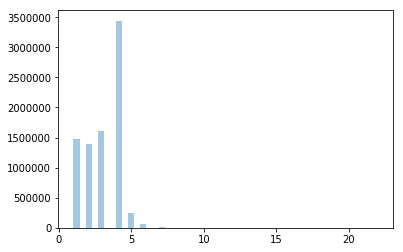

In [366]:
sns.distplot(not_null_counts, kde=False)

In [695]:
df_splitted.to_pickle('df_splitted.pickle')

### Reconcile 0

In [537]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [453]:
df_selection = df_splitted[(df_splitted.groupby(level=[0,1])[0].shift(-1).str.contains(num_regex).fillna(False) & (not_null_counts==3))|
            (df_splitted[0].str.contains(num_regex) & (not_null_counts==1))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [454]:
selection_not_null = df_selection.notnull().sum(axis=1)

In [490]:
# selects every row that has 3 elements and next row has 1 element
select_three = (selection_not_null.groupby(level=[0,1, 2]).shift(0)*100 + selection_not_null.groupby(level=[0,1, 2]).shift(-1).fillna(0)) == 301
# selects every row that has 1 element and prev row has 3 elements
select_one = (selection_not_null.groupby(level=[0,1, 2]).shift(1).fillna(0)*100 + selection_not_null.groupby(level=[0,1, 2]).shift(0)) == 301
# combination of the two
select_rows = select_three | select_one
select_rows.sum()

564284

In [457]:
filt = df_selection[select_rows].groupby(level=[0,1]).count()[0].apply(lambda x: x%2 != 0)
filt.sum()

0

In [476]:
df_selection.loc[select_three, 3] = df_selection[select_one][0].values

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [478]:
df_splitted.loc[select_three.where(select_three).dropna().index] = df_selection[select_three].values
df_splitted.drop(select_one.where(select_one).dropna().index, inplace=True)

In [482]:
df_splitted.loc['bpt6k6282019m', 72, 46]

,,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
line,split,,,,,,,,,,,,,,,,,,,,,
0,0,Bertrand fr. et Villain,batistes,Jeûneurs,32.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reconcile 1

In [527]:
df_left = df_splitted.loc[df_splitted.index.difference(df_clean.index)]

In [535]:
print("Already processed %d rows or %.2f%%, %d rows left"%(len(df_clean), len(df_clean)/len(df_splitted)*100, len(df_left)))

Already processed 3131125 rows or 39.31%, 4833524 rows left


In [529]:
not_null_counts_left = df_left.notnull().sum(axis=1)

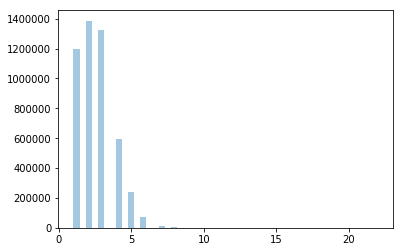

In [530]:
sns.distplot(not_null_counts_left, kde=False)

In [537]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [539]:
df_selection = df_left[not_null_counts_left == 2][(df_left[not_null_counts_left == 2].groupby(level=[0,1, 2])[1].shift(-1).str.contains(num_regex).fillna(False))|
            (df_left[not_null_counts_left == 2][1].str.contains(num_regex))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [542]:
selection_not_null = df_selection.notnull().sum(axis=1)

In [546]:
is_number = df_left[not_null_counts_left == 2][1].str.contains(num_regex).astype(int)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [571]:
# selects every row that has 3 elements and next row has 1 element
select_other = (is_number.groupby(level=[0,1, 2]).shift(0)*100 + is_number.groupby(level=[0,1, 2]).shift(-1).fillna(0)) == 1
# selects every row that has 1 element and prev row has 3 elements
select_num = (is_number.groupby(level=[0,1, 2]).shift(1).fillna(4) + is_number.groupby(level=[0,1, 2]).shift(0)*100) == 100
# combination of the two
select_rows = select_other | select_num
select_rows.sum()

473968

In [584]:
df_selection.loc[select_other, 2:3] = df_selection.loc[select_num, :1].values

In [587]:
df_splitted.loc[select_other.where(select_other).dropna().index] = df_selection[select_other].values
df_splitted.drop(select_num.where(select_num).dropna().index, inplace=True)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Block

In [687]:
df_lines_with_split_selection = df_lines_with_split.loc[df_lines_with_split.index.intersection(df_splitted.index).difference(df_clean.index)]

In [693]:
df_block = df_lines_with_split_selection.groupby(level=[0,1,2]).apply(lambda x: ' '.join(x))

In [697]:
df_block_splitted = df_block.str.split(',', expand=True)
# df_splitted.set_index(df_splitted.groupby(level=[0,1,2,3]).cumcount(),  append=True, inplace=True)
# df_splitted.index.set_names('split', level=4, inplace=True)
df_block_splitted = df_block_splitted.apply(lambda col: col.str.strip())
df_block_splitted.replace('', np.nan, inplace=True)
df_block_splitted.fillna(value=pd.np.nan, inplace=True)

In [698]:
df_block_splitted.head()

0   \
document      page block                                                      
bpt6k6282019m 72   4                                                 Bertin   
                   9                                         Bertin-Burrier   
                   10     Bertin de Chalup 4 i ancien chef d'escadron Vi...   
                   11                                   Bertin de Vaux (E.)   
                   12                                        des Beaux-Arts   

                                                             1   \
document      page block                                          
bpt6k6282019m 72   4                           tourneur en bois   
                   9      fab. de ouates et teinturier en grand   
                   10                                   27 bis.   
                   11                                O. peintre   
                   12                                 Sts-Pères   

                                           2           3          4    5   \
document      page block                                                    
bpt6k6282019m 72   4                Bonaparte          80  etMélière   1.   
                   9      Vignes Saint-Marcel  10 et. 12.        NaN  NaN   
                   10                     NaN         NaN        NaN  NaN   
                   11                inspect.         NaN        NaN  NaN   
                   12                      7.         NaN        NaN  NaN   

                           6    7    8    9  ...    51   52   53   54   55  \
document      page block                     ...                             
bpt6k6282019m 72   4      NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   9      NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   10     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   11     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   12     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   

                           56   57   58   59   60  
document      page block                           
bpt6k6282019m 72   4      NaN  NaN  NaN  NaN  NaN  
                   9      NaN  NaN  NaN  NaN  NaN  
                   10     NaN  NaN  NaN  NaN  NaN  
                   11     NaN  NaN  NaN  NaN  NaN  
                   12     NaN  NaN  NaN  NaN  NaN  

[5 rows x 61 columns]

In [699]:
not_null_counts = df_block_splitted.notnull().sum(axis=1)

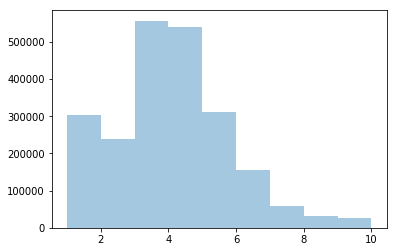

In [703]:
sns.distplot(not_null_counts, kde=False, bins=np.arange(1,11, 1))

### Reconcile 0

In [705]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [706]:
df_selection = df_block_splitted[(df_block_splitted.groupby(level=[0,1])[0].shift(-1).str.contains(num_regex).fillna(False) & (not_null_counts==3))|
            (df_block_splitted[0].str.contains(num_regex) & (not_null_counts==1))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [711]:
len(df_selection)

48861

In [707]:
selection_not_null = df_selection.notnull().sum(axis=1)

In [710]:
# selects every row that has 3 elements and next row has 1 element
select_three = (selection_not_null.groupby(level=[0,1]).shift(0)*100 + selection_not_null.groupby(level=[0,1]).shift(-1).fillna(0)) == 301
# selects every row that has 1 element and prev row has 3 elements
select_one = (selection_not_null.groupby(level=[0,1]).shift(1).fillna(0)*100 + selection_not_null.groupby(level=[0,1]).shift(0)) == 301
# combination of the two
select_rows = select_three | select_one
select_rows.sum()

29130

In [712]:
filt = df_selection[select_rows].groupby(level=[0,1]).count()[0].apply(lambda x: x%2 != 0)
filt.sum()

0

In [713]:
df_selection.loc[select_three, 3] = df_selection[select_one][0].values

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [716]:
df_block_splitted.loc[select_three.where(select_three).dropna().index] = df_selection[select_three].values
df_block_splitted.drop(select_one.where(select_one).dropna().index, inplace=True)

### Reconcile 1

In [738]:
df_left = df_block_splitted.loc[df_block_splitted.index.difference(df_clean_block.index)]

In [739]:
print("Already processed %d rows or %.2f%%, %d rows left"%(len(df_clean_block), len(df_clean_block)/len(df_block_splitted)*100, len(df_left)))

Already processed 371064 rows or 16.68%, 1853429 rows left


In [740]:
not_null_counts_left = df_left.notnull().sum(axis=1)

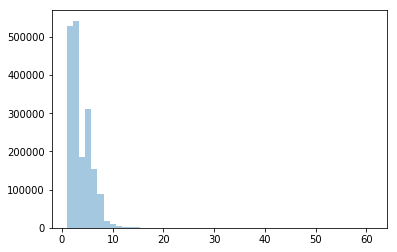

In [741]:
sns.distplot(not_null_counts_left, kde=False)

In [742]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [768]:
df_selection = df_left[not_null_counts_left == 2][(df_left[not_null_counts_left == 2].groupby(level=[0,1])[1].shift(-1).str.contains(num_regex).fillna(False))|
            (df_left[not_null_counts_left == 2][1].str.contains(num_regex))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [769]:
len(df_selection)

138093

In [770]:
selection_not_null = df_selection.notnull().sum(axis=1)

In [771]:
is_number = df_left[not_null_counts_left == 2][1].str.contains(num_regex).astype(int)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [772]:
# selects every row that has 3 elements and next row has 1 element
select_other = (is_number.groupby(level=[0,1]).shift(0)*100 + is_number.groupby(level=[0,1]).shift(-1).fillna(0)) == 1
# selects every row that has 1 element and prev row has 3 elements
select_num = (is_number.groupby(level=[0,1]).shift(1).fillna(4) + is_number.groupby(level=[0,1]).shift(0)*100) == 100
# combination of the two
select_rows = select_other | select_num
select_rows.sum()

87366

In [776]:
df_selection.loc[select_other, 2:3] = df_selection.loc[select_num, :1].values

In [778]:
df_block_splitted.loc[select_other.where(select_other).dropna().index] = df_selection[select_other].values
df_block_splitted.drop(select_num.where(select_num).dropna().index, inplace=True)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Export cleaned

### Cleaned line

In [792]:
not_null_counts = df_splitted.notnull().sum(axis=1)

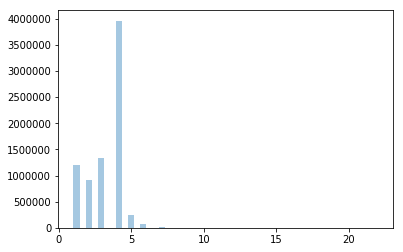

In [793]:
sns.distplot(not_null_counts, kde=False)

In [794]:
df_length_four = df_splitted[not_null_counts == 4]
len(df_length_four)

3960462

In [609]:
df_length_four = df_splitted[not_null_counts == 4]
len(df_length_four)

3960462

In [795]:
number_filter = df_length_four[3].str.strip().str.rstrip('.').str.contains(r'([0-9]+|bis)')

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [796]:
# A name must be at least 3 letters
name_filter = df_length_four[0].map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(r'^[A-Z].*\w{2}')

In [797]:
# At least 2 letter work
work_filter = df_length_four[1].map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(r'^[a-zA-Z].*\w{1}').fillna(False)

In [798]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(3799834, 3796331, 3880580, 3608361)

In [613]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(3799834, 3796331, 3880580, 3608361)

In [799]:
df_clean = df_length_four[(name_filter & number_filter & work_filter)]
df_clean.to_pickle('df_clean.pickle')

In [658]:
df_clean = pd.read_pickle('df_clean.pickle')

In [659]:
len(df_clean)

3608361

In [634]:
df_clean.iloc[:, 0:4].rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'}).reset_index(level=[1,2,3,4], drop=True).join(df_rep[['annee']]).to_csv('strict_adressing.csv')

### Cleaned block

In [781]:
not_null_counts = df_block_splitted.notnull().sum(axis=1)

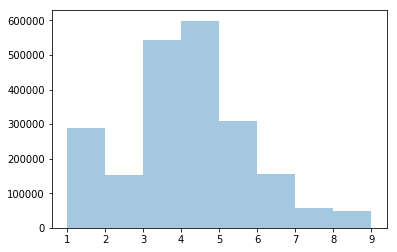

In [782]:
sns.distplot(not_null_counts, kde=False, bins=np.arange(1,10,1))

In [783]:
df_length_four = df_block_splitted[not_null_counts == 4]
len(df_length_four)

599009

In [720]:
df_length_four = df_block_splitted[not_null_counts == 4]
len(df_length_four)

555326

In [784]:
number_filter = df_length_four[3].str.strip().str.rstrip('.').str.contains(r'([0-9]+|bis)')

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [785]:
# A name must be at least 3 letters
name_filter = df_length_four[0].map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(r'^[A-Z].*\w{2}')

In [786]:
# At least 2 letter work
work_filter = df_length_four[1].map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(r'^[a-zA-Z].*\w{1}').fillna(False)

In [787]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(520971, 509705, 552598, 403712)

In [788]:
df_clean_block = df_length_four[(name_filter & number_filter & work_filter)]
df_clean_block.to_pickle('df_clean_block.pickle')

In [658]:
df_clean_block = pd.read_pickle('df_clean_block.pickle')

In [789]:
len(df_clean_block), len(df_clean_block)+len(df_clean)

(403712, 4012073)

In [800]:
pd.concat([df_clean_block.iloc[:, 0:4].rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'})
           .reset_index(level=[1,2], drop=True),
           df_clean.iloc[:, 0:4].rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'})
           .reset_index(level=[1,2,3,4], drop=True)]).join(df_rep[['annee']]).to_csv('strict_adressing.csv')

In [804]:
df_rep['pages'].sum()*75*3

6204600.0